# Handball Match Analysis using Multiple Statistical Models.



This notebook analyzes handball match data using various statistical models to predict match outcomes

and analyze model performance. We'll use several statistical approaches including:



- Bradley-Terry model for paired comparisons

- TOOR (Team Offense-Offense Rating)

- GSSD (Goal Scoring Statistical Distribution)

- ZSD (Zero-Score Distribution)

- PRP (Possession-based Rating Process)

- Poisson model

## Setup and Imports



First, let's import the required packages and set up our visualization preferences.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from ssat.frequentist import GSSD, PRP, TOOR, ZSD, BradleyTerry, Poisson

# Configure plotting style
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")


## Data Loading and Preparation



Load the handball match data and extract relevant features and target variables.

In [2]:
# Load the data
print("Loading handball match data...")
df = pd.read_pickle("ssat/data/sample_handball_data.pkl")

# Extract features and target variables
X = df[["home_team", "away_team"]]
Z = df[["home_goals", "away_goals"]]
y = df["spread"]

# Display basic information about the dataset
print("\nDataset Overview:")
print(df.info())
print("\nSample of the data:")
print(df.head())


Loading handball match data...

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, KpVrB7Po to SUKTBAKE
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   country        105 non-null    object        
 1   league         105 non-null    object        
 2   season         105 non-null    object        
 3   datetime       105 non-null    datetime64[ns]
 4   home_team      105 non-null    object        
 5   away_team      105 non-null    object        
 6   home_goals     105 non-null    int64         
 7   away_goals     105 non-null    int64         
 8   result         105 non-null    int64         
 9   home_goals_h1  105 non-null    Int64         
 10  away_goals_h1  105 non-null    Int64         
 11  home_goals_h2  105 non-null    Int64         
 12  away_goals_h2  105 non-null    Int64         
 13  home_index     105 non-null    int64         
 14  away_index     10

## Model Configuration



Set up prediction parameters and initialize our model containers.

In [3]:
# Set prediction parameters
outcome = "draw"
point_spread = 0
include_draw = True

# Initialize DataFrames for predictions
preds_df = pd.DataFrame(index=X.index)
preds_proba_df = pd.DataFrame(index=X.index)

# Define models
models = [BradleyTerry(), TOOR(), GSSD(), ZSD(), PRP(), Poisson()]


## Model Fitting and Prediction



Fit each model and generate predictions.

In [4]:
# Fit models and generate predictions
for model in models:
    model.fit(X, y, Z)
    preds_df[model.NAME.lower()] = model.predict(X)
    preds_proba_df[model.NAME.lower()] = model.predict_proba(
        X, Z, point_spread, include_draw, outcome
    )


## Model Performance Analysis



### 1. Prediction Distributions

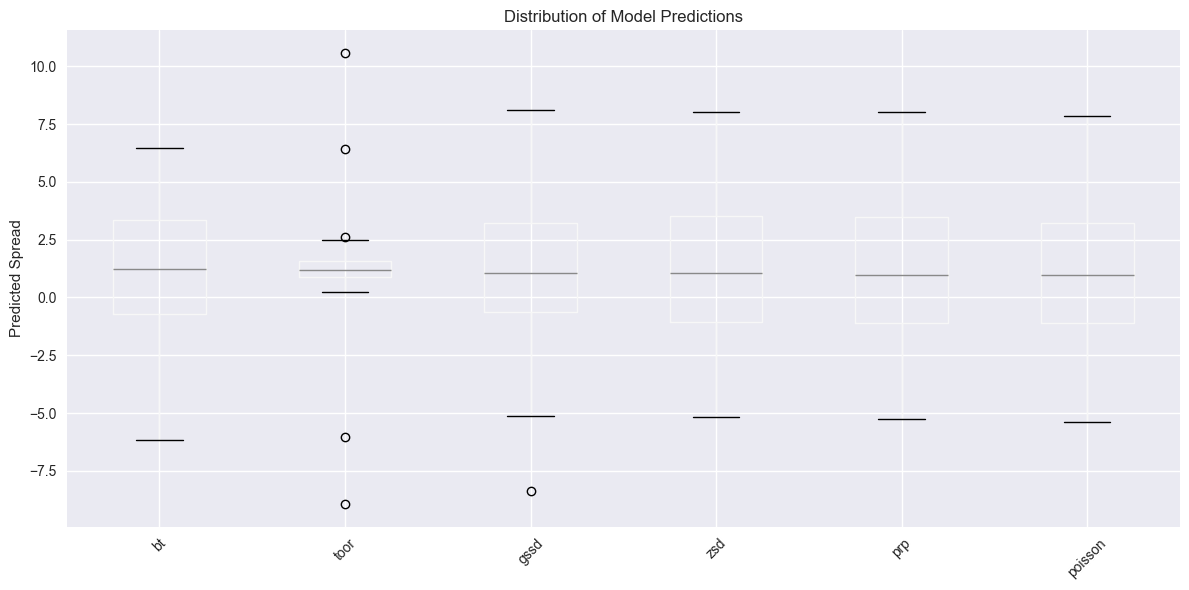

In [5]:
# Model Prediction Distribution
plt.figure(figsize=(12, 6))
preds_df.boxplot()
plt.title("Distribution of Model Predictions")
plt.xticks(rotation=45)
plt.ylabel("Predicted Spread")
plt.tight_layout()
# plt.savefig("plots/prediction_distribution.png")
plt.show()


### 2. Probability Distributions

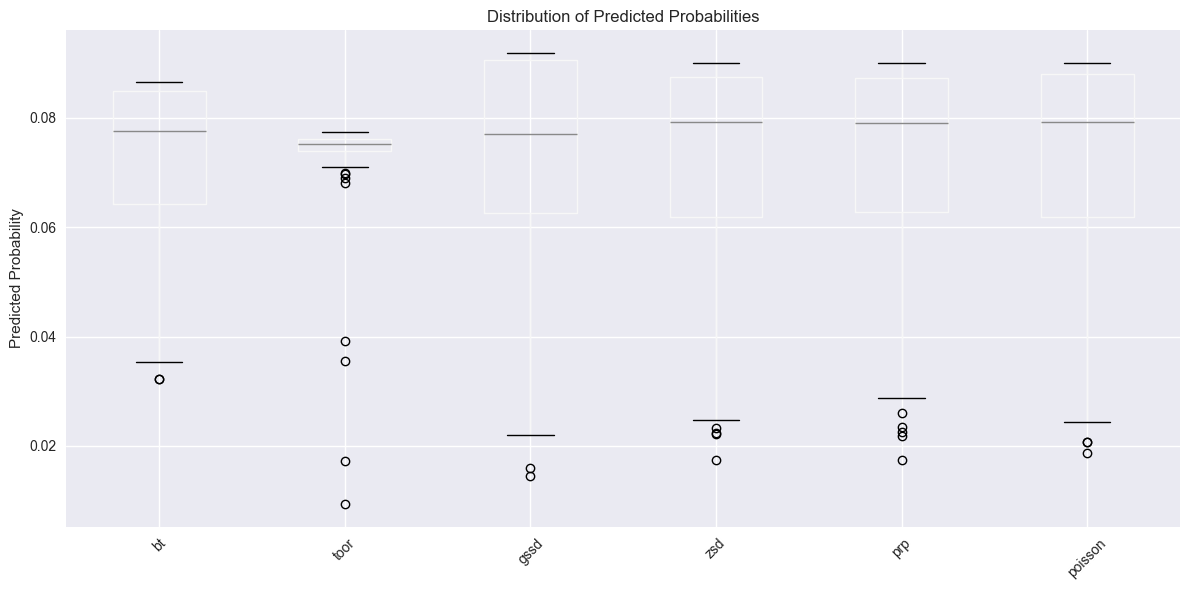

In [6]:
# Probability Distribution
plt.figure(figsize=(12, 6))
preds_proba_df.boxplot()
plt.title("Distribution of Predicted Probabilities")
plt.xticks(rotation=45)
plt.ylabel("Predicted Probability")
plt.tight_layout()
# plt.savefig("plots/probability_distribution.png")
plt.show()


### 3. Model Correlations

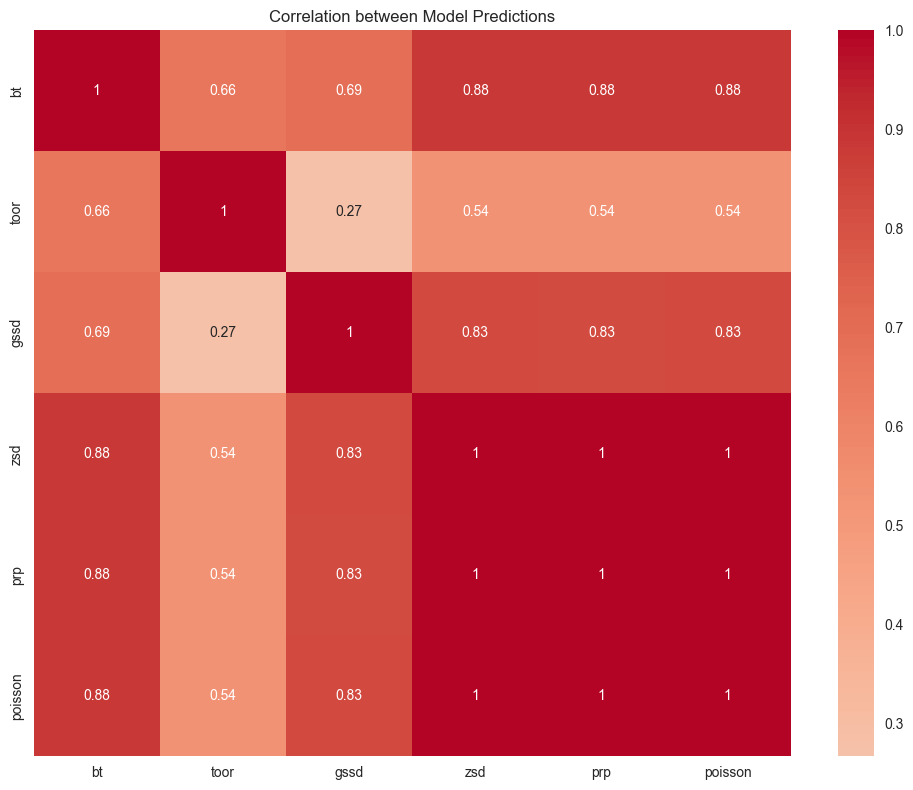

In [7]:
# Model Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(preds_df.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation between Model Predictions")
plt.tight_layout()
# plt.savefig("plots/model_correlation.png")
plt.show()


## Statistical Analysis



Calculate and analyze prediction and probability statistics.

In [8]:
# Calculate prediction statistics
stats_dict = {
    "Mean": preds_df.mean(),
    "Std": preds_df.std(),
    "Min": preds_df.min(),
    "Max": preds_df.max(),
}
prediction_stats = pd.DataFrame(stats_dict).round(3)

# Calculate probability statistics
proba_stats_dict = {
    "Mean Probability": preds_proba_df.mean(),
    "Std Probability": preds_proba_df.std(),
    "Min Probability": preds_proba_df.min(),
    "Max Probability": preds_proba_df.max(),
}
probability_stats = pd.DataFrame(proba_stats_dict).round(3)

print("Prediction Statistics:")
print(prediction_stats)
print("\nProbability Statistics:")
print(probability_stats)


Prediction Statistics:
          Mean    Std    Min     Max
bt       1.229  2.840 -6.174   6.479
toor     1.229  1.681 -8.940  10.585
gssd     1.229  3.223 -8.358   8.126
zsd      1.252  3.108 -5.194   8.034
prp      1.229  3.099 -5.242   8.045
poisson  1.229  3.103 -5.386   7.851

Probability Statistics:
         Mean Probability  Std Probability  Min Probability  Max Probability
bt                  0.071            0.016            0.032            0.087
toor                0.073            0.010            0.009            0.077
gssd                0.072            0.021            0.014            0.092
zsd                 0.072            0.020            0.017            0.090
prp                 0.072            0.020            0.017            0.090
poisson             0.072            0.020            0.019            0.090
